#Median House Value with one-hidden layer neural networks (Classification)
### Keras

## Import libraries 



Runtime type has been set to GPU

In [ ]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## 2. Load data

In [ ]:
# Modify the paths accordingly to point the csv files in your own gdrive file system.
ATT_FILE = "/gdrive/My Drive/Colab Notebooks/datasets/Housing/MedianHouseValue/MedianHouseValuePreparedCleanAttributes.csv"
LABEL_FILE = "/gdrive/My Drive/Colab Notebooks/datasets/Housing/MedianHouseValue/MedianHouseValueOneHotEncodedClasses.csv"

TRAIN_RATE=0.8 # 80% of the entire dataset is for training purposes

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)
#n_final_test = n_instances-n_train-n_dev

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)

print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

# We can not employ the final test set yet, since this is not the final neural approach 

x_train: (16342, 9)
t_train: (16342, 3)
x_dev: (2043, 9)
t_dev: (2043, 3)


## 3. Initialize variables

In [ ]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))

Some data is displayed to test correctness:

In [ ]:
x_train[:5]

array([[ 0.21713147, -0.69394261,  0.41176471, -0.93926446, -0.88733706,
        -0.90924634, -0.89278079, -0.77585137, -1.        ],
       [-0.69322709,  0.17747078, -0.29411765, -0.91795107, -0.88671633,
        -0.95448303, -0.88949186, -0.59159184,  1.        ],
       [ 0.44820717, -0.95961743,  0.37254902, -0.8306628 , -0.80074488,
        -0.89349477, -0.79575728, -0.5589716 ,  1.        ],
       [ 0.29083665, -0.7088204 , -0.41176471, -0.87629076, -0.85909373,
        -0.94315984, -0.84377569, -0.48705535, -1.        ],
       [-0.40039841,  0.15834219, -0.49019608, -0.8418536 , -0.84574798,
        -0.93413493, -0.82765992, -0.16468738, -0.33333333]])

In [ ]:
t_train[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
x_dev[:5]

array([[ 0.22908367, -0.67906482,  0.45098039, -0.83366397, -0.77343265,
        -0.81524146, -0.76155238, -0.67868029, -1.        ],
       [-0.61752988,  0.10308183,  1.        , -0.94201129, -0.93078833,
        -0.97247681, -0.93257688, -0.37100178,  0.33333333],
       [-0.39043825,  0.16046759, -0.88235294, -0.92929447, -0.90037244,
        -0.90016536, -0.89870087, -0.74136908, -0.33333333],
       [-0.24701195, -0.45377258, -0.33333333, -0.85156926, -0.82774674,
        -0.94030102, -0.81877981, -0.58286093, -1.        ],
       [ 0.22908367, -0.73645058, -0.25490196, -0.90589552, -0.82774674,
        -0.90420135, -0.81746423, -0.86805699,  1.        ]])

In [ ]:
t_dev[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## 4. Set hyperparameters

The learning rate $\alpha$, the batch size, and the number of neurons in the hidden layer are the three hyperparameters to adjust. The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [ ]:
n_epochs = 1000 # 32,000 it aprox.
learning_rate = 0.1
batch_size = 500
n_hidden = 1000

## 5. Build the model: a full-connected 9-1000-3 neural network architecture

First of all, a sequential model is created. This is the Keras model for fully-connected feedforward neural networks in which layers are sequentially connected. This is called the *sequential* API.

In [ ]:
model = keras.Sequential(name="OneHiddenLayer")

Define the deep neural network topology. Note that the **tanh** activation function is chosen for the hidden layer and  **softmax** for the ouput layer. 

The model takes as input matrix tensors with *INPUTS* columns and any number of rows. *InputLayer* creates a placeholder where the data is ready to feed the network. Then we create the hidden layer with the *tanh* activation function. Finally, we add the output layer with the *softmax* activation function. 

In [ ]:
model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

model.add(keras.layers.Dense(n_hidden, activation="tanh"))

model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))
model.summary()

Model: "OneHiddenLayer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              10000     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3003      
Total params: 13,003
Trainable params: 13,003
Non-trainable params: 0
_________________________________________________________________


Note there are 13,003 parameters to adjust per iteration. 

## 6. Compile the model

Compiling the model means specifying the *loss* function (the $log-loss$,  $cross-entropy$, the sum of log-loss is a loss) and the *optimizer* (Gradient Descent) to use. Optionally, you can also set a list of additional *metrics* (Accuracy) to compute during training and evaluation. In this case, 

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=learning_rate),
              metrics=["categorical_accuracy"])

There are several losses functions, optimizers, and metrics. Full lists are available at: https://keras.io/losses/, https://keras.io/optimizers/ and https://keras.io/metrics/.

## 7. Train the model

Note that an **epoch** is an iteration over the entire training dataset provided.

In [ ]:
import time
start = time.clock()
history = model.fit(x_train, t_train, batch_size=batch_size, epochs=n_epochs, verbose=0, validation_data=(x_dev, t_dev))    
print (time.clock() - start)

97.76075900000001


Note that training took only 97 secs. with verbose=0. If verbose=0, the training process slows down.

## 8. Get the results

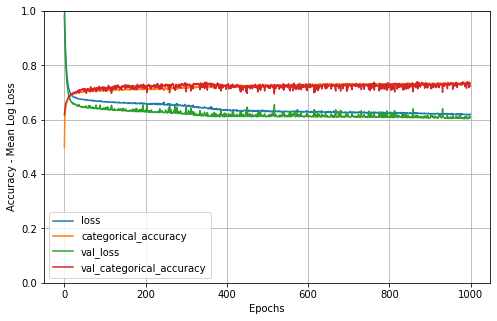

In [ ]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
results[-1:]

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
999,0.620964,0.735528,0.612237,0.723935


The accuracy is 73.5% on training and 72% on the development test set, similar to those achieved with the Tensorflow implementation. However, **the training process only took 97 secs.**

In [ ]:
dev_predictions=model.predict(x_dev).round(2)
dev_predictions[:20]

array([[0.24, 0.72, 0.03],
       [0.  , 0.06, 0.93],
       [0.86, 0.14, 0.  ],
       [0.01, 0.16, 0.84],
       [0.54, 0.44, 0.01],
       [0.01, 0.46, 0.53],
       [0.  , 0.33, 0.67],
       [0.  , 0.09, 0.91],
       [0.  , 0.  , 1.  ],
       [0.65, 0.33, 0.02],
       [0.12, 0.79, 0.09],
       [0.37, 0.56, 0.08],
       [0.37, 0.48, 0.15],
       [0.17, 0.68, 0.16],
       [0.94, 0.06, 0.  ],
       [0.01, 0.11, 0.88],
       [0.92, 0.07, 0.  ],
       [0.  , 0.06, 0.94],
       [0.06, 0.75, 0.19],
       [0.  , 0.01, 0.99]], dtype=float32)

In [ ]:
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
t_dev[:20] #target classes

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(t_dev,1))
print (dev_correct_predictions[:30])

[False  True  True False False False  True  True  True False  True  True
 False False  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True]


In [ ]:
from collections import Counter
Counter (dev_correct_predictions)

Counter({False: 566, True: 1477})